<h1>French Twitter Sentiment Analysis


Dataset from: https://www.kaggle.com/hbaflast/french-twitter-sentiment-analysis?select=french_tweets.csv

วัตถุประสงค์<br>
- เพื่อทำให้สังคมบนโลกออนไลน์ที่ใช้ภาษาฝรั่งเศษดีขึ้น
- ป้องกัน Cyberbully ในประเทศที่ใช้ภาษาฝรั่งเศษ

เชื่อมต่อกับ Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ใช้ library pandas สร้างข้อมูลในรูปตาราง ข้อมูลแต่ละแถวเป็นข้อมูลของ 1 ความคิดเห็น ประกอบด้วย 2 คอลัมน์ ได้แก่
- ข้อความ (Text) เช่น  - Awww, c'est un bummer. Tu devrais avoir davi...
- ความคิดเห็น (label) มีค่า 0 หรือ 1 โดยความคิดเห็นเป็นบวกมีค่าเป็น 1 ความคิดเห็นเป็นลบมีค่าเป็น 0


In [ ]:
import pandas as pd
twit=pd.read_csv('/content/drive/MyDrive/datasets/french_tweets.csv')
twit.head()

,label,text
0,0,"- Awww, c'est un bummer. Tu devrais avoir davi..."
1,0,Est contrarié qu'il ne puisse pas mettre à jou...
2,0,J'ai plongé plusieurs fois pour la balle. A ré...
3,0,Tout mon corps a des démangeaisons et comme si...
4,0,"Non, il ne se comporte pas du tout. je suis en..."


จำนวนข้อมูลทั้งหมด


In [ ]:
print(len(twit))

1526724


1526724


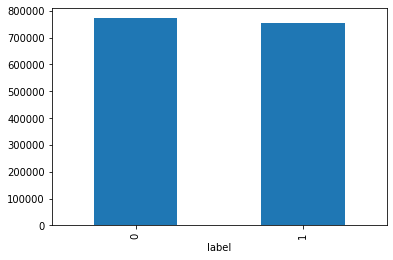

In [ ]:
import matplotlib.pyplot as plt
print(len(twit))
twit.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
twit.groupby('label').describe()

text                                                                
        count  unique                                                top freq
label                                                                        
0      771604  746963  je suis perdu. Aidez-moi à trouver une bonne m...  524
1      755120  728281  Obtenez 100 abonnés par jour en utilisant www....  783

ทำการสลับข้อมูลทั้งหมด

In [ ]:
twit = twit.sample(frac=1).reset_index(drop=True)
print(twit)

         label                                               text
0            0  - disais-tu - je suis mieux que toi, ajoute-t-...
1            1                                     viens chez moi
2            0                            Je déteste ce hardcore.
3            1  Lui envoyant des souhaits d'anniversaire de la...
4            1  Le monde est à moi !!!!!!!!!!!! Mais je peux p...
...        ...                                                ...
1526719      0  C'est la première journée de la mère que j'ai ...
1526720      0  Essayant les sushis pour la toute première foi...
1526721      1  Arrêté à une autre station service à la fraise...
1526722      0   Pauvres, je suis sûr que ce ne sera pas si grave
1526723      1  Aujourd'hui, c'était l'un des meilleurs jours ...

[1526724 rows x 2 columns]


เนื่องจากข้อมูลมีจำนวนมากถึง 1526724 แล้วใช้เวลาในกัน train model นานถึง 3 ชม. ต่อ epoch ทำให้ colab ดับไปก่อนจึงใช้ข้อมูลเพียง 100000 ในการ train model

ดึงข้อมูลที่เป็น positive มาจำนวน 50000 ประโยค

In [ ]:
pos = twit[:50000]

ดึงข้อมูลที่เป็น Negative มาจำนวน 50000 ประโยค

In [ ]:
neg = twit[771604:821604]

In [ ]:
twitAll = pos.append(neg)

In [ ]:
twitAll

,label,text
0,0,"- disais-tu - je suis mieux que toi, ajoute-t-..."
1,1,viens chez moi
2,0,Je déteste ce hardcore.
3,1,Lui envoyant des souhaits d'anniversaire de la...
4,1,Le monde est à moi !!!!!!!!!!!! Mais je peux p...
...,...,...
821599,0,Je n'ai entendu aucun de mes 4 enfants ce jour...
821600,0,"Homme, il se déverse à nos portes maintenant. ..."
821601,1,Heureux ... heureux ... samedi à tous !!!
821602,1,"Omg, c'est cuisiner des cookies pour la journé..."


ทำการแบ่งข้อมูลเป็น train test

In [ ]:
from sklearn.model_selection import train_test_split
X = twitAll['text']
Y = twitAll['label']

sentences_train, sentences_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

Stopword ภาษาฝรั่งเศษ

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('french'))
print(stopwords)

{'avais', 'par', 'la', 'nous', 'le', 'étant', 'de', 'fûtes', 'vous', 'qu', 'aie', 'ayante', 'fut', 'serais', 'as', 'sommes', 'au', 'à', 'avec', 'aurons', 'étais', 'eussions', 'ne', 'que', 'sera', 'fusses', 'ayez', 'aviez', 'eusse', 'ce', 'fusse', 'eues', 'aies', 'on', 'fussions', 'nos', 'avions', 'étaient', 'moi', 'ces', 'des', 'ils', 'fussiez', 'eue', 'furent', 'fûmes', 'serions', 'ma', 'seras', 'eussiez', 'auraient', 'ai', 'serait', 'été', 'elle', 'sont', 'aurais', 'auras', 'serai', 'qui', 'ou', 'dans', 'lui', 'une', 'serez', 'd', 'sa', 'votre', 'auriez', 'fussent', 'serons', 'eurent', 'ses', 'mes', 'ayantes', 'seraient', 'ait', 'aient', 'êtes', 'étante', 'eux', 'étées', 'aura', 'fus', 's', 'es', 'fût', 'y', 'j', 'eussent', 'suis', 'en', 'avaient', 'eut', 'eûtes', 'sur', 'ton', 'était', 'avait', 'soient', 'mais', 'soit', 'vos', 'les', 'te', 'sois', 'étantes', 'me', 'aurai', 'du', 'étants', 'avez', 'aurions', 'toi', 'avons', 'étée', 'eus', 'pas', 'il', 'auront', 'et', 'étiez', 'pour',

ใช้มอดูล CountVectorizer ใน library scikit-learn เพื่อแปลงข้อความให้อยู่ในรูป vector โดย

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

## สร้างคำศัพท์ที่ใช้เป็น feature จากข้อมูล train
vectorizer = CountVectorizer(stop_words=stopwords)
vectorizer.fit(sentences_train.values)
print(len(vectorizer.vocabulary_))


## สร้าง feature vector หรือ Bag-of-word(BOW) feature 
X_train = vectorizer.transform(sentences_train.values)
X_test  = vectorizer.transform(sentences_test.values)

46743


In [ ]:
print(X_train.shape) 

(80000, 46743)


In [ ]:
print(X_train[0])

  (0, 2611)	1
  (0, 11340)	1
  (0, 18969)	1
  (0, 22860)	1
  (0, 37229)	1
  (0, 40643)	1
  (0, 41886)	1


In [ ]:
import numpy as np
y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train)
print(y_test)

[1 1 1 ... 1 1 0]
[1 1 0 ... 1 0 1]


<h1>Logistic Regreession Model

Logistic Regreession เป็นโมเดลที่ใช้หาความน่าจะเป็นที่จะเป็น class นั้นๆ มีค่าอยู่ในช่วง 0–1 <br>
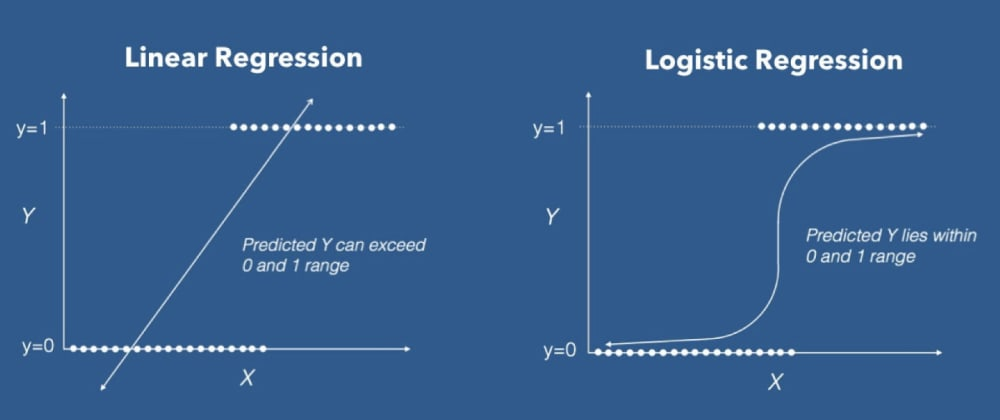

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.74875


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<h1>Neural Network<h1>

 ฟังก์ชัน​ plot​ graph​ ค่า​ accuracy​ กับ​ค่า​ loss

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
 
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
 
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
input_dim = X_train.shape[1]  # Number of features
print(input_dim)

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

46743


#รูปโครงสร้าง Neural Network
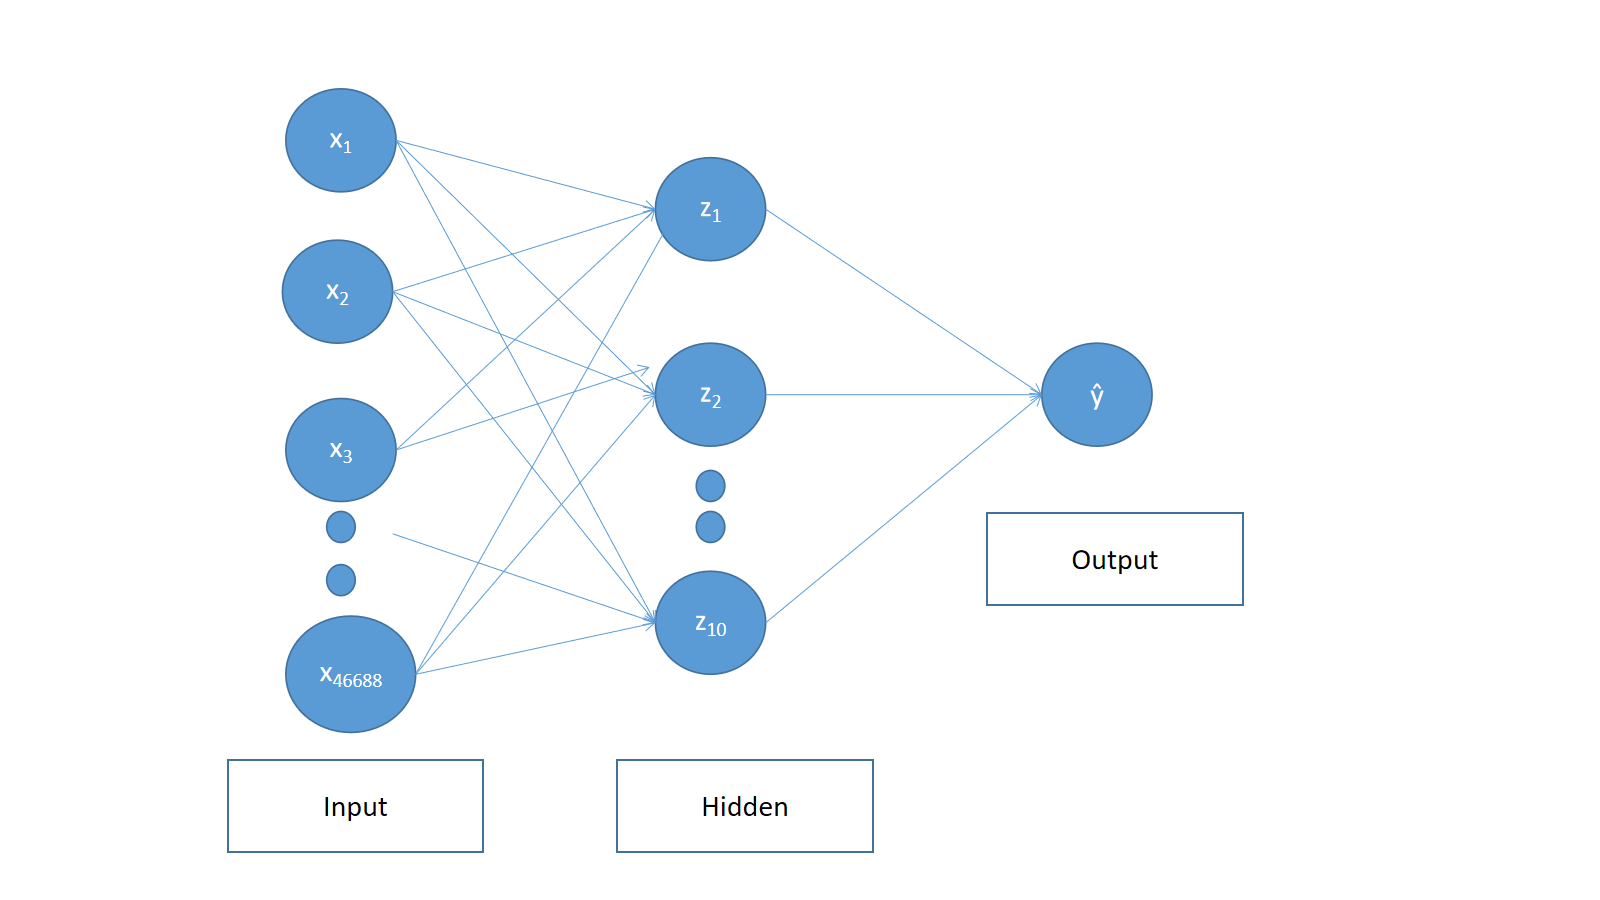

Binary Crossentropy คือ ค่าเฉลี่ยของ Cross-Entropy ที่เกิดจากการแจกแจงความน่าจะเป็น 2 แบบ คือ การแจกแจงความน่าจะเป็นที่เราอยากได้ (Actual) กับการแจกแจงความน่าจะเป็นที่ถูกประมาณโดย Model (Predicted) ของ Class 0 และ Class 1 

Adam คือ Optimizer ที่สามารถปรับ leaning rate ได้เองโดยอัตโนมัติ 

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                467440    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 467,451
Trainable params: 467,451
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
313/313 [==============================] - 5s 4ms/step - loss: 0.6394 - accuracy: 0.6859 - val_loss: 0.5302 - val_accuracy: 0.7533
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4808 - accuracy: 0.7909 - val_loss: 0.5158 - val_accuracy: 0.7538
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4254 - accuracy: 0.8178 - val_loss: 0.5239 - val_accuracy: 0.7494
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3871 - accuracy: 0.8376 - val_loss: 0.5376 - val_accuracy: 0.7473
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8551 - val_loss: 0.5573 - val_accuracy: 0.7421
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.8643 - val_loss: 0.5782 - val_accuracy: 0.7369
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3065 - accuracy: 0.8744 - val_loss: 0.6006 - val_accuracy: 0.7331
Epoch 

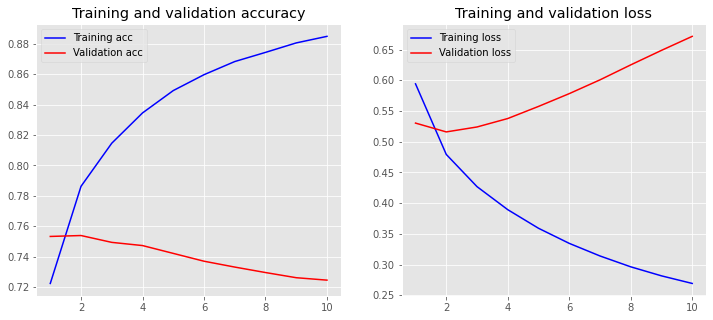

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=256)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

<h1>Deep Learning Model (CNN)</h1>

In [ ]:
clear_session()

เพิ่มชั้น word embedding ใน neural networks

ใช้ Tokenizer ใน library keras เพื่อทำการสร้าง vector ของข้อความ

ค่าในแต่ละ vector จะหมายถึง index ของคำศัพท์

In [ ]:
from keras.preprocessing.text import Tokenizer
 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
 
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
 
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
 
print(sentences_train[0])
print(X_train[0])

Désolé, vous allez dun laoighre aujourd'hui?
[2626, 363]


#### Padding
ทำการปรับขนาดข้อความให้เท่ากัน เรียกว่าการทำ Padding

ปรับให้ vector ของแต่ละข้อความมีขนาดเท่ากัน ถ้าไม่เท่าให้เติม 0 ต่อท้ายเท่ากับความยาวสูงสุดที่กำหนด
จากตัวอย่าง กำหนดขนาดข้อความให้มีจำนวน token สูงสุดไม่เกิน 100 (maxlen)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[2626  363    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
embedding_dim = 100

model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.Conv1D(128, 5, activation='relu'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          5058600   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 5,124,029
Trainable params: 5,124,029
Non-trainable params: 0
_________________________________________________________________


#รูปโครงสร้าง Model CNN
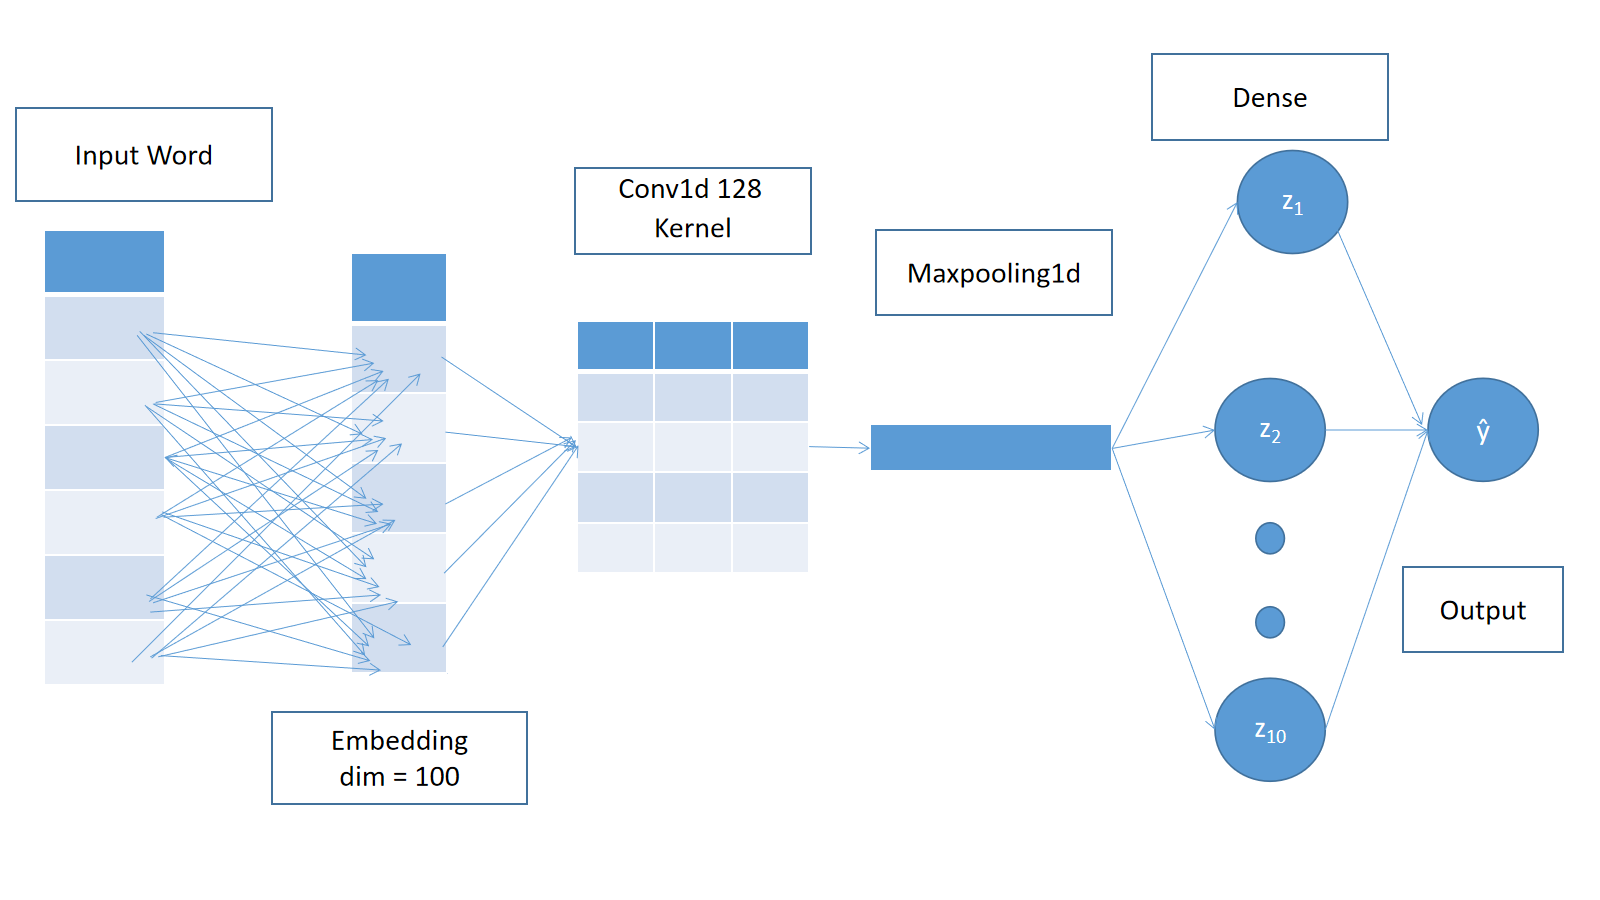

Epoch 1/10
313/313 [==============================] - 50s 65ms/step - loss: 0.5921 - accuracy: 0.6752 - val_loss: 0.4764 - val_accuracy: 0.7730
Epoch 2/10
313/313 [==============================] - 19s 61ms/step - loss: 0.4369 - accuracy: 0.8005 - val_loss: 0.4683 - val_accuracy: 0.7807
Epoch 3/10
313/313 [==============================] - 19s 60ms/step - loss: 0.3786 - accuracy: 0.8330 - val_loss: 0.4751 - val_accuracy: 0.7764
Epoch 4/10
313/313 [==============================] - 19s 60ms/step - loss: 0.3180 - accuracy: 0.8685 - val_loss: 0.5073 - val_accuracy: 0.7688
Epoch 5/10
313/313 [==============================] - 19s 60ms/step - loss: 0.2451 - accuracy: 0.9087 - val_loss: 0.5660 - val_accuracy: 0.7574
Epoch 6/10
313/313 [==============================] - 19s 60ms/step - loss: 0.1763 - accuracy: 0.9395 - val_loss: 0.6629 - val_accuracy: 0.7486
Epoch 7/10
313/313 [==============================] - 19s 60ms/step - loss: 0.1256 - accuracy: 0.9605 - val_loss: 0.7833 - val_accuracy:

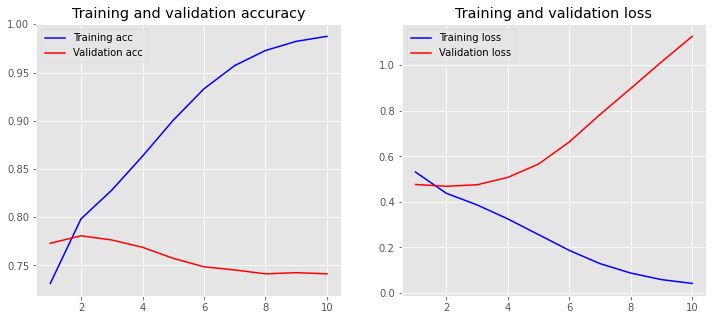

In [ ]:
history_cnn = model2.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=256)
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history_cnn)

<h1>Advanced Deep Learning Model (accuracy สูงที่สุด)

จะเห็นได้ว่าโมเดลก่อนหน้าเกิด Overfitting ขึ้นเราจะทำการใช้ Dropout เพื่อให้โมเดลไม่จำคำตอบ

In [ ]:
clear_session()

In [ ]:
embedding_dim = 100

model3 = Sequential()
model3.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model3.add(layers.Conv1D(128, 5, activation='relu'))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          5058600   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

#รูปโครงสร้าง Model CNN + Dropout
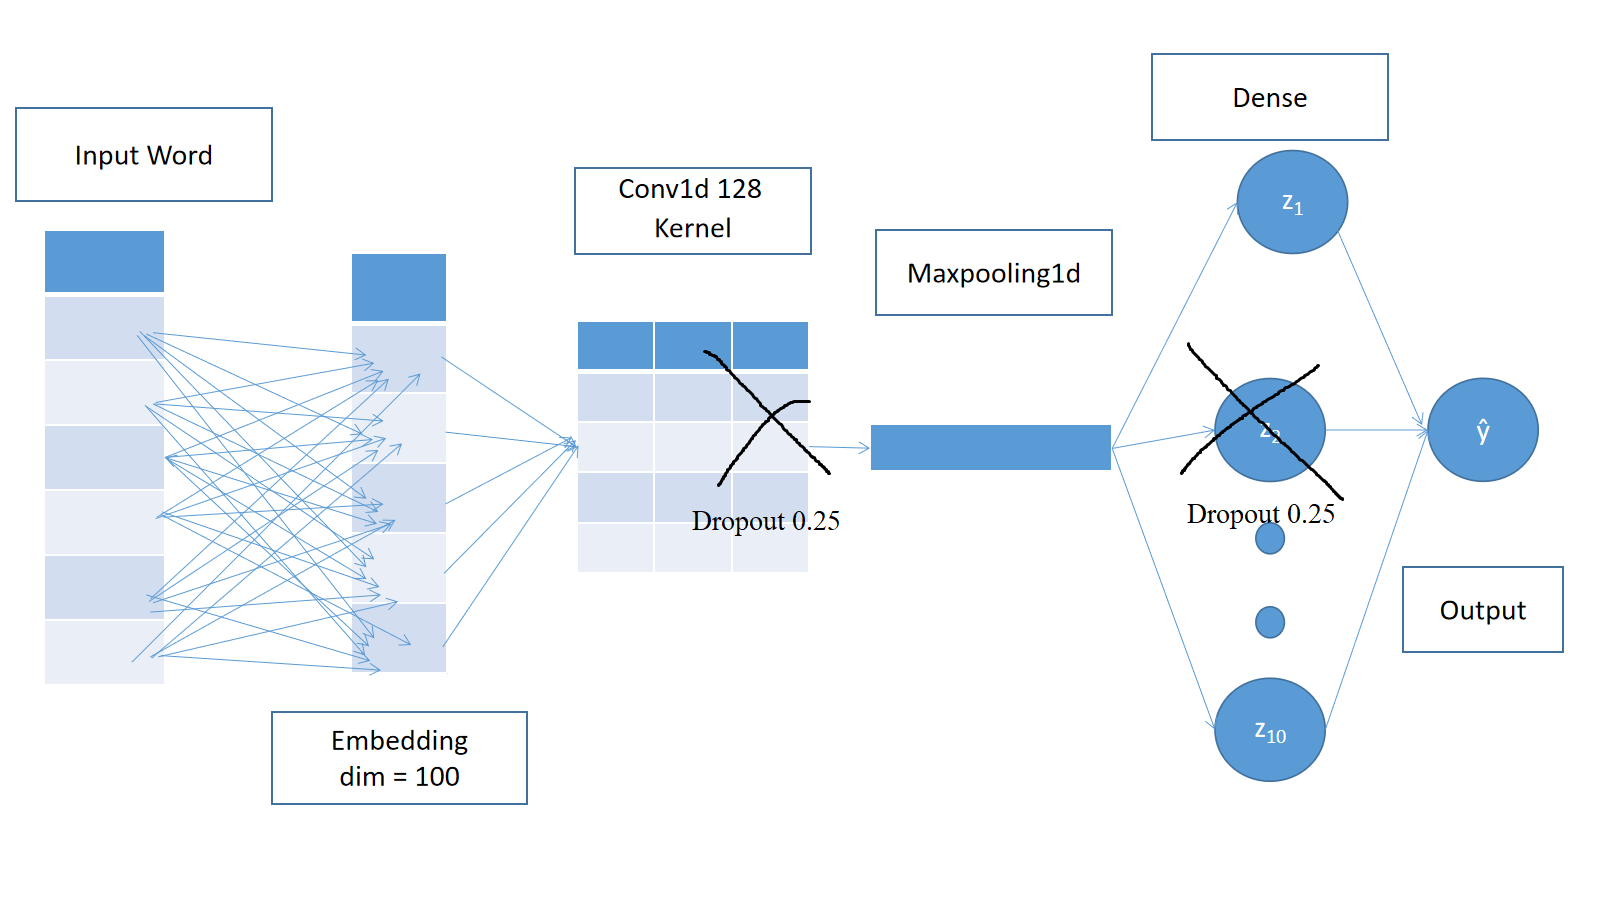

Epoch 1/10
313/313 [==============================] - 19s 58ms/step - loss: 0.6105 - accuracy: 0.6560 - val_loss: 0.4830 - val_accuracy: 0.7720
Epoch 2/10
313/313 [==============================] - 18s 57ms/step - loss: 0.4614 - accuracy: 0.7914 - val_loss: 0.4705 - val_accuracy: 0.7782
Epoch 3/10
313/313 [==============================] - 18s 57ms/step - loss: 0.4218 - accuracy: 0.8154 - val_loss: 0.4745 - val_accuracy: 0.7765
Epoch 4/10
313/313 [==============================] - 18s 56ms/step - loss: 0.3770 - accuracy: 0.8388 - val_loss: 0.4956 - val_accuracy: 0.7705
Epoch 5/10
313/313 [==============================] - 18s 57ms/step - loss: 0.3287 - accuracy: 0.8648 - val_loss: 0.5178 - val_accuracy: 0.7685
Epoch 6/10
313/313 [==============================] - 18s 57ms/step - loss: 0.2778 - accuracy: 0.8887 - val_loss: 0.5528 - val_accuracy: 0.7623
Epoch 7/10
313/313 [==============================] - 18s 57ms/step - loss: 0.2380 - accuracy: 0.9061 - val_loss: 0.6237 - val_accuracy:

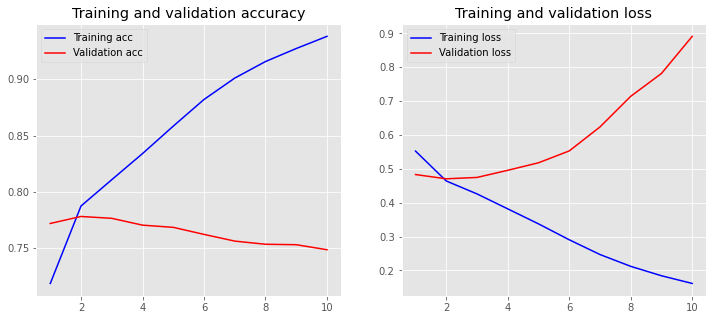

In [ ]:
history_cnn_drop = model3.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=256)
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history_cnn_drop)

<h1>วิเคราะห์และเปรียบเทียบผลการทดลอง

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predict_model2 = model2.predict(X_test).round()
predict_model3 = model3.predict(X_test).round()

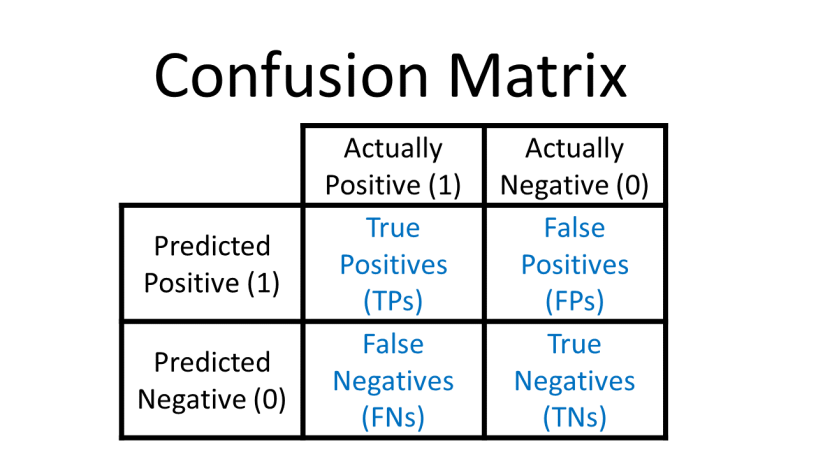

True Positive (TP)= สิ่งที่ทำนาย ตรงกับสิ่งที่เกิดขึ้นจริง ในกรณี ทำนายว่าจริง และสิ่งที่เกิดขึ้น ก็คือ จริง<br>
True Negative (TN)= สิ่งที่ทำนายตรงกับสิ่งที่เกิดขึ้น ในกรณี ทำนายว่า ไม่จริง และสิ่งที่เกิดขึ้น ก็คือ ไม่จริง<br>
False Positive (FP)= สิ่งที่ทำนายไม่ตรงกับสิ่งที่เกิดขึ้น คือทำนายว่า จริง แต่สิ่งที่เกิดขึ้น คือ ไม่จริง<br>
False Negative (FN)= สิ่งที่ทำนายไม่ตรงกับที่เกิดขึ้นจริง คือทำนายว่าไม่จริง แต่สิ่งที่เกิดขึ้น คือ จริง

In [ ]:
#CNN
print(confusion_matrix(y_test , predict_model2))
print(classification_report(y_test , predict_model2))

[[7465 2733]
 [2441 7361]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     10198
           1       0.73      0.75      0.74      9802

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



In [ ]:
#CNN + Dropout
print(confusion_matrix(y_test , predict_model3))
print(classification_report(y_test , predict_model3))

[[7392 2806]
 [2220 7582]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75     10198
           1       0.73      0.77      0.75      9802

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



#อ้างอิง<br>
Confusion Matrix
https://medium.com/@pagongatchalee/confusion-matrix-%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%A1%E0%B8%B7%E0%B8%AD%E0%B8%AA%E0%B8%B3%E0%B8%84%E0%B8%B1%E0%B8%8D%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A1%E0%B8%B4%E0%B8%99%E0%B8%9C%E0%B8%A5%E0%B8%A5%E0%B8%B1%E0%B8%9E%E0%B8%98%E0%B9%8C%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%97%E0%B8%B3%E0%B8%99%E0%B8%B2%E0%B8%A2-%E0%B9%83%E0%B8%99machine-learning-fba6e3f9508c<br><br>
เอกสารการสอนและอื่นๆของ ผู้ช่วยศาสตราจารย์ ดร. ทัศนวรรณ ศูนย์กลาง https://drive.google.com/file/d/1wdxbRE1huZQ67gl7938TLAZBEckoqxpq/view<br><br>
Binary Crossentropy บทความโดย อ.ดร.ณัฐโชติ พรหมฤทธิ์
https://blog.pjjop.org/loss-functions-for-training-deep-learning-model-part2/?fbclid=IwAR0x6lkvDXrhuz6BMRyheYj_WVNm0FEYD2HrB2RiD698tcC_Xs22II83jq4
